Install Packages

In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install sklearn
!pip install numpy

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


Import Packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import numpy as np

Define Columns

In [3]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

Load Dataset

In [4]:
df = pd.read_csv('4) house Prediction Data Set.csv', header=None, delimiter=r"\s+", names=column_names)

Initial Data Inspection

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [46]:
df.isnull()
df.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [47]:
df.duplicated()
df.duplicated().sum()

np.int64(0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Descriptive Statistic

In [9]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Exploratory Data Analysis

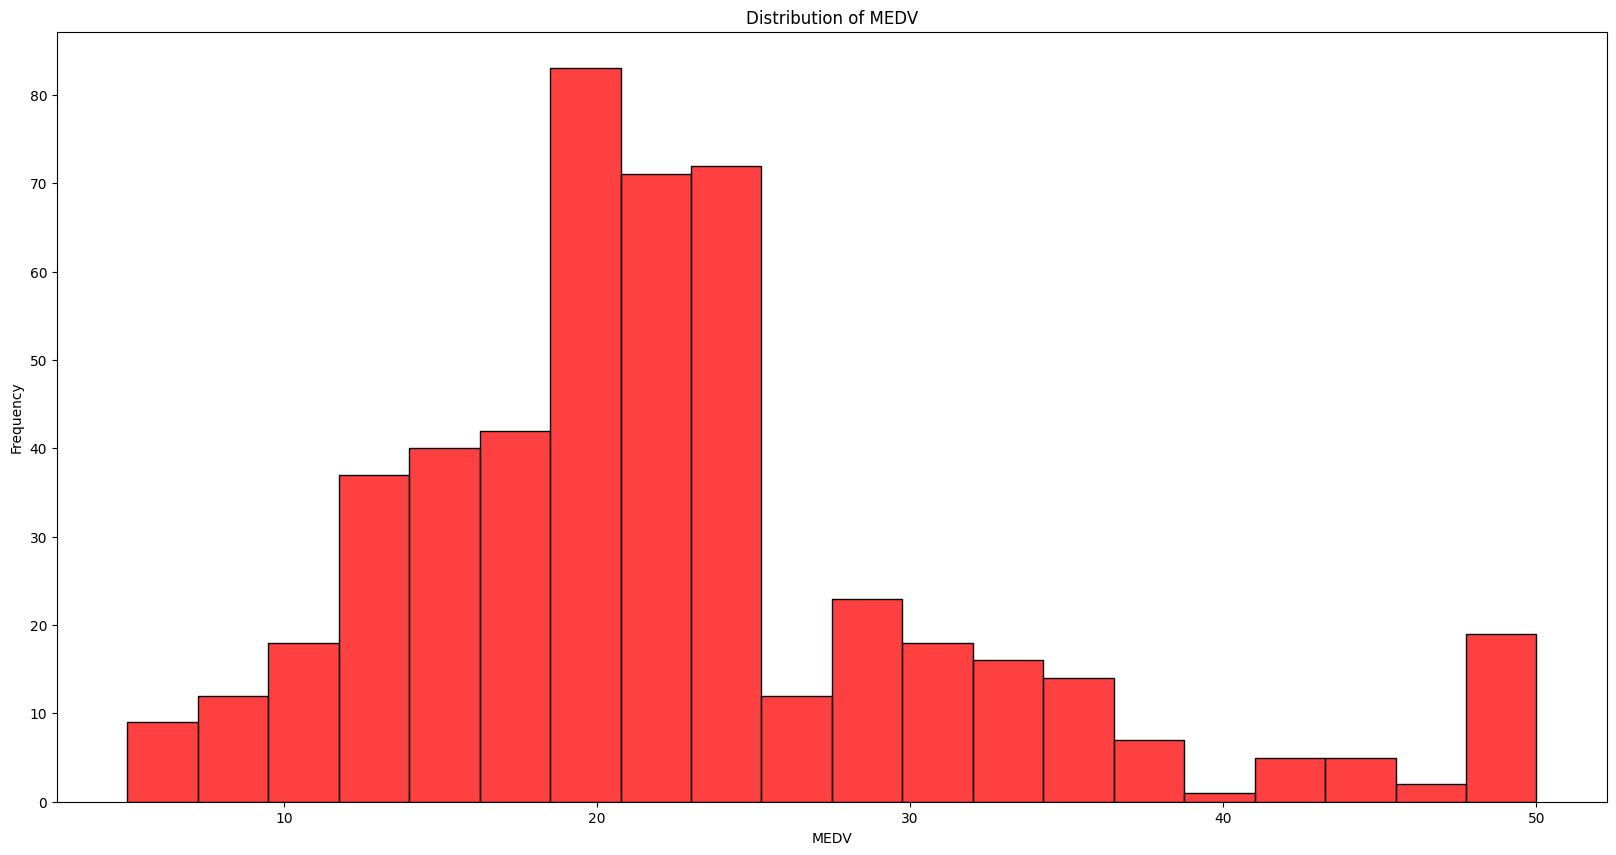

In [10]:
plt.figure(figsize=(20,10))
sns.histplot(df['MEDV'], bins= 20, color='red')
plt.title('Distribution of MEDV')
plt.xlabel('MEDV')
plt.ylabel('Frequency')
plt.show()

In [11]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


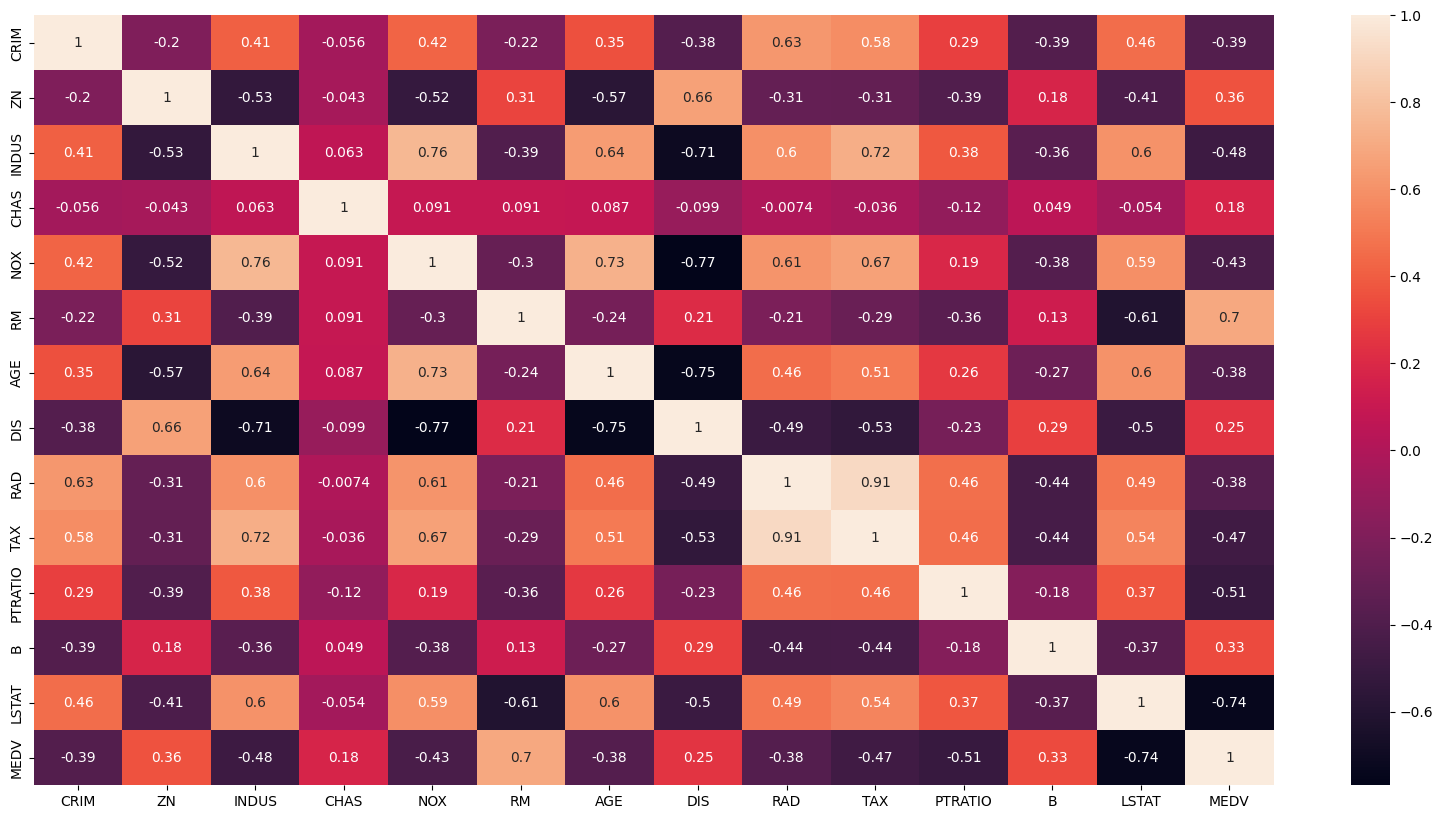

In [12]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [13]:
df.corr()['MEDV'].abs().sort_values(ascending=False)

,MEDV
MEDV,1.000000
LSTAT,0.737663
RM,0.695360
PTRATIO,0.507787
INDUS,0.483725
TAX,0.468536
NOX,0.427321
CRIM,0.388305
RAD,0.381626
AGE,0.376955


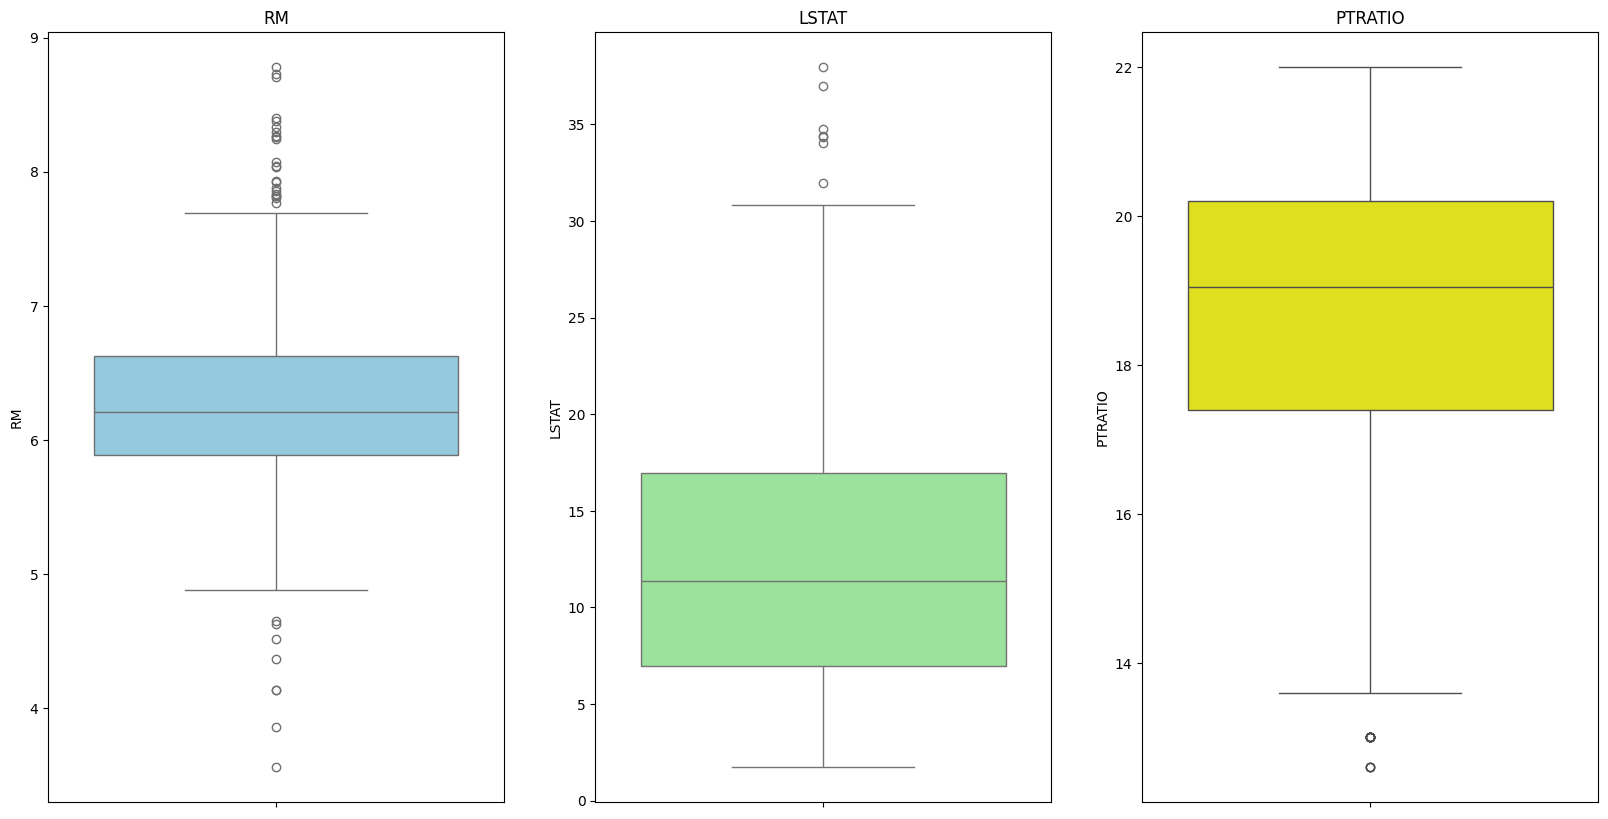

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(20,10))
sns.boxplot(data=df['RM'], ax=axes[0], color= 'skyblue')
sns.boxplot(data=df['LSTAT'], ax=axes[1], color= 'lightgreen')
sns.boxplot(data=df['PTRATIO'], ax=axes[2], color= 'yellow')
axes[0].set_title('RM')
axes[1].set_title('LSTAT')
axes[2].set_title('PTRATIO')
plt.show()

Remove Outlier

In [15]:
from numpy._core.defchararray import lower
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

In [16]:
df_clean= df[df['MEDV']<50.0].copy()
df_clean= remove_outliers(df_clean, 'RM')
df_clean= remove_outliers(df_clean, 'LSTAT')
df_clean= remove_outliers(df_clean, 'PTRATIO')

In [17]:
print(df_clean)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14

Splitting Dataset into Training and Testing Sets

In [18]:
x = df_clean.drop('MEDV', axis=1)
y = df_clean['MEDV']
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.2, random_state=42)

MODEL 1: LINEAR REGRESSION

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
Lr_model = LinearRegression()
Lr_model.fit(x_train, y_train)

LinearRegression()

In [21]:
y_pred_Lr= Lr_model.predict(x_test)
Lr_comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_Lr})
print(Lr_comparison_df)

     Actual  Predicted
336    19.5  21.079434
39     30.8  29.687276
383    12.3  11.952841
453    17.8  20.957179
156    13.1  14.281253
..      ...        ...
501    22.4  23.383882
139    17.8  16.459867
93     25.0  27.449467
57     31.6  30.957121
480    23.0  21.109409

[91 rows x 2 columns]


In [22]:
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
from sklearn.metrics import r2_score
r2_score_value = r2_score(y_test, y_pred_Lr)
print(r2_score_value)

0.8042868281677213


In [24]:
mse= mean_squared_error(y_test, y_pred_Lr)
print(mse)

6.488868439549035


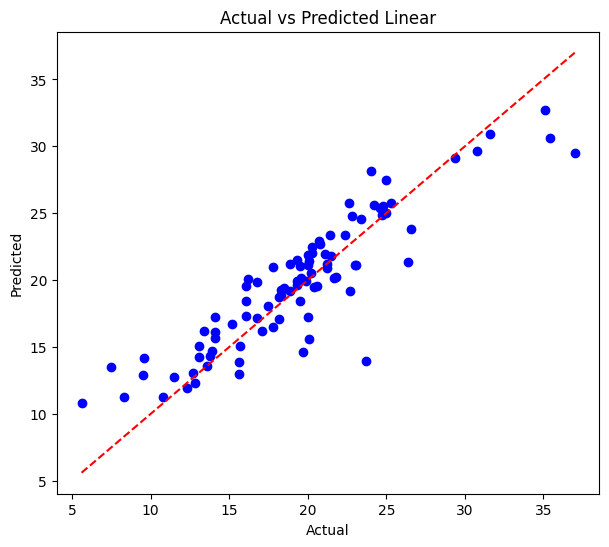

In [25]:
plt.figure(figsize=(7,6))
plt.scatter(y_test, y_pred_Lr, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Linear')
plt.show()

MODEL 2: DECISION TREE

In [26]:
from sklearn.tree import DecisionTreeRegressor

In [27]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [28]:
y_pred_dt= dt_model.predict(x_test)
dt_comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_dt})
print(dt_comparison_df)

     Actual  Predicted
336    19.5       18.5
39     30.8       26.6
383    12.3        5.0
453    17.8       12.6
156    13.1       15.6
..      ...        ...
501    22.4       29.8
139    17.8       16.2
93     25.0       28.1
57     31.6       29.8
480    23.0       20.1

[91 rows x 2 columns]


In [29]:
dt_model.score(x_test, y_test)

0.6542346769597278

In [30]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
r2_score_value = r2_score(y_test, y_pred_dt)
print(r2_score_value)
print(mean_squared_error(y_test, y_pred_dt))

0.6542346769597278
11.463846153846154


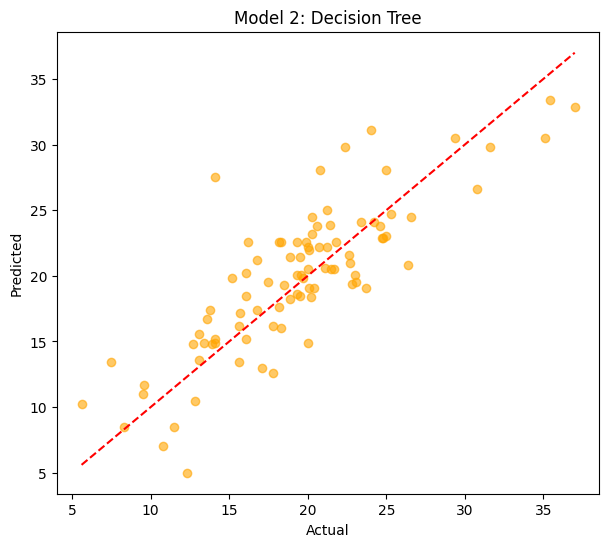

In [31]:
plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_pred_dt, color='orange', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Model 2: Decision Tree")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

MODEL 3: RANDOM FOREST

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [34]:
y_pred_rf= rf_model.predict(x_test)
rf_comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})
print(rf_comparison_df)

     Actual  Predicted
336    19.5     19.340
39     30.8     27.500
383    12.3      9.758
453    17.8     14.710
156    13.1     16.323
..      ...        ...
501    22.4     24.727
139    17.8     16.471
93     25.0     24.025
57     31.6     31.601
480    23.0     20.929

[91 rows x 2 columns]


In [35]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
r2_score_value = r2_score(y_test, y_pred_rf)
print(r2_score_value)
print(mean_squared_error(y_test, y_pred_rf))

0.8445831556771124
5.152844065934067


In [36]:
rf_model.score(x_test, y_test)

0.8445831556771124

Text(0, 0.5, 'Predicted')

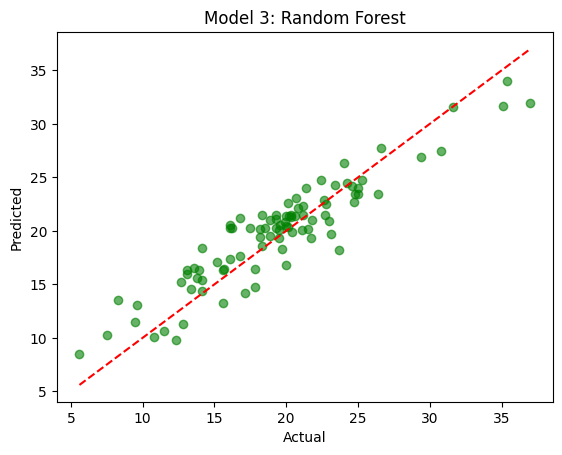

In [37]:
plt.plot(y_test, y_pred_rf, 'o', color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Model 3: Random Forest")
plt.xlabel("Actual")
plt.ylabel("Predicted")

MODEL COMPARISON

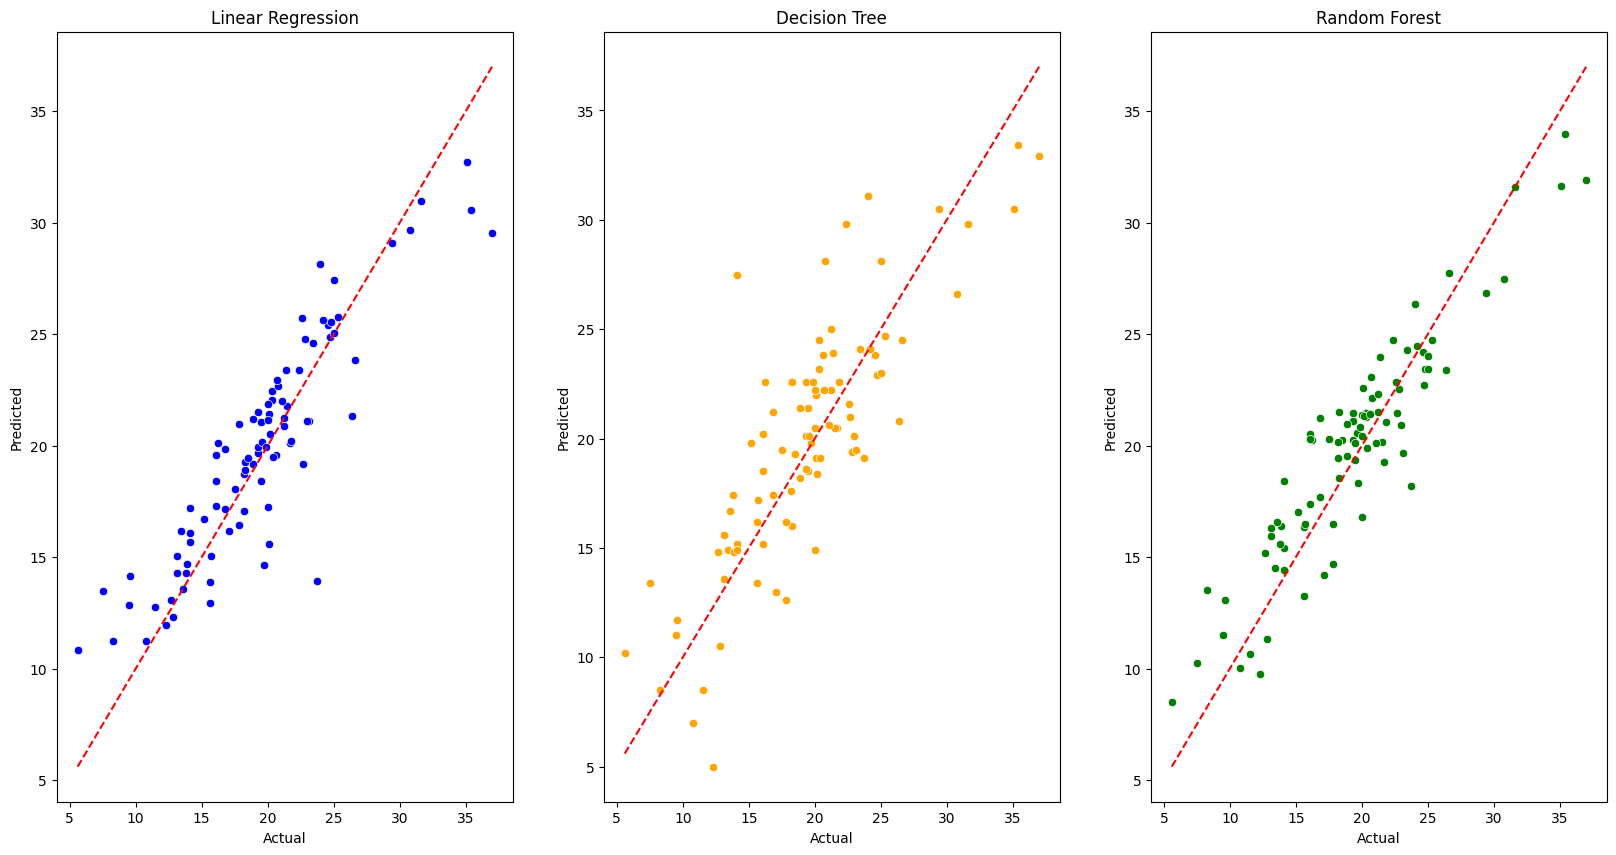

In [38]:
fig, axes = plt.subplots(1, 3, figsize=(20,10))
sns.scatterplot(data=Lr_comparison_df, x='Actual', y='Predicted', ax=axes[0], color='blue')
sns.scatterplot(data=dt_comparison_df, x='Actual', y='Predicted', ax=axes[1], color='orange')
sns.scatterplot(data=rf_comparison_df, x='Actual', y='Predicted', ax=axes[2], color='green')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axes[0].set_title('Linear Regression')
axes[1].set_title('Decision Tree')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axes[2].set_title('Random Forest')
axes[2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

SAVING MODEL & EXPORTING RESULTS

In [39]:
import joblib

In [40]:
name_file= 'random_forest_model.pkl'
joblib.dump(rf_model, name_file)

['random_forest_model.pkl']

In [41]:
y_pred_final= rf_model.predict(x_test)
df_export= x_test.copy()
df_export['Actual_price']= y_test * 1000
df_export['Predicted_price']= y_pred_final * 1000

In [42]:
df_export['difference']= df_export['Actual_price'] - df_export['Predicted_price']

In [43]:
file_name= 'final_data.csv'
df_export.to_csv(file_name, index=False)


In [44]:
xlxs_name= 'final_data.xlsx'
df_export.to_excel(xlxs_name, index=False)